In [1]:
%matplotlib inline
#%matplotlib notebook

import numpy as np
import textwrap

from runners.vStirapRunner import ExperimentalRunner, Atom4lvl, CavityBiref, LaserCoupling, CavityCoupling

i = np.complex(0,1)

# Section 2 - 4-level atom with birefringent cavity

### 2.1 Degenerate polarisation modes (i.e. 1.1 revisited)

A sensible sanity check is that we get the same results as we did in section 1 (specifically 1.1) when our 'birefringent' cavity has no polarisation mode splitting ($\Delta_P=0$) and equal decay rates of orthogonal polarisations from the cavity ($\kappa_1 = \kappa_2$).

**Note**

When using a birefringent cavity, the photon number in each polarisation eigenmode needs to be considered independently.  This means our states now take the form
	|atom_state, $n_X$, $n_Y$>
where $n_X$ / $n_Y$ are the photon number in each polarisation eigenmode of the cavity.  This means we set up and we simulate our system in the so-called 'cavity basis'.  This basis is chosen as there is no direct coupling between the cavity eigenmodes, simplifying the Hamiltonians compared to any other (equally valid) choice of polarisation basis.

With no cavity decay or spontaneous emission.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_0_10523.pyx.  Generated in 4.388 seconds.
Running simulation with 501 timesteps...finished in 0.104 seconds


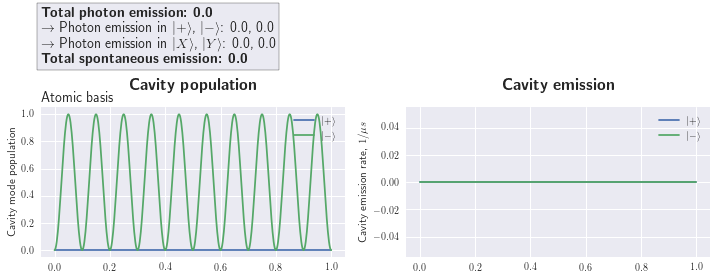

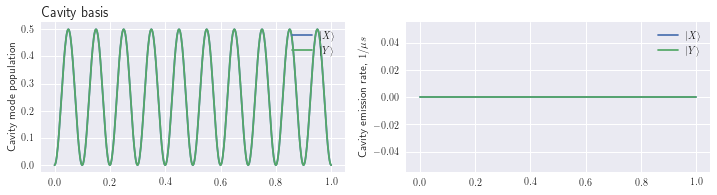

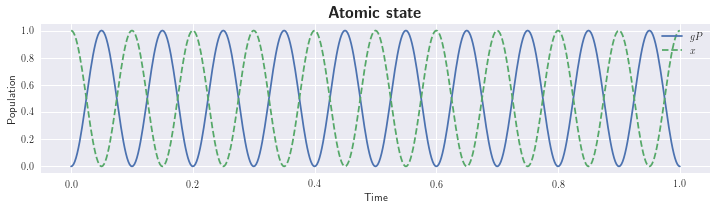

In [2]:
atom4lvl = Atom4lvl(gamma=0.0* 2*np.pi)
cav = CavityBiref(g = 5 * 2.*np.pi,
                  kappa1 = 0.0 * 2.*np.pi,
                  kappa2 = 0.0 * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

psi0 = runner.ket('x',0, 0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot(atom_states=['gP','x'])

Damped vacuum Rabi oscillations.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_1_10523.pyx.  Generated in 4.175 seconds.
Running simulation with 501 timesteps...finished in 0.104 seconds


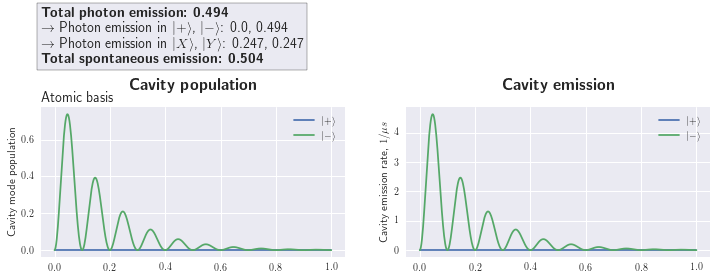

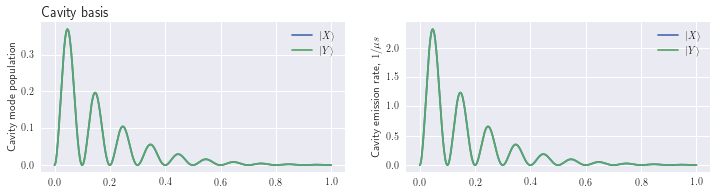

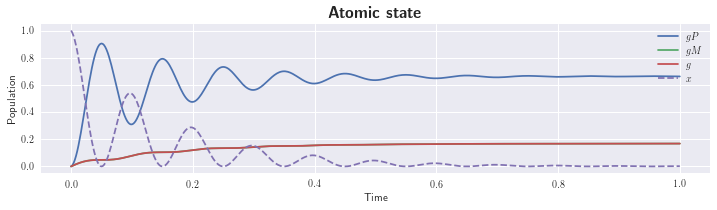

In [3]:
atom4lvl = Atom4lvl(gamma=0.5* 2*np.pi)
cav = CavityBiref(g = 5 * 2.*np.pi,
                  kappa1 = 0.5 * 2.*np.pi,
                  kappa2 = 0.5 * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

psi0 = runner.ket('x',0, 0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

Feel free to similarly repeat any of the simualtions from Section 1 with using the CavityBiref object with $\kappa_1 = \kappa_2$ and $\Delta_P=0$.

### 2.2 Additional plotting options

The plots generated from our simulations are different when we have a birefringent cavity.  There is more detail and more options with regards to plotting the cavity population and emission in different polarisation bases.

Specifically, the _ExperimentalResultsBiref().plot() method takes the 'pol_bases' argument.  This is a list of the bases in which to consider the photon state.  Each item in the list can be either:
>  - one of the recognised polarisation bases keywords: 'atom','cavity','linear','circ', or one of their aliases 'a','atom', 'c', 'cav' etc.
>  - a custom polarisation basis defined by a list: [2x2 Rotation matrix from basis to lab, basis name, [basis pol. state 1 label, basis pol. state 2 label]].

*Note: by default the result is plotted in the atomic and cavity bases.*

Here we will repeat the above simualtion of vacuum-Rabi oscillations, but plot the results in a variety of bases.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_1_10618.pyx.  Generated in 4.039 seconds.
Running simulation with 501 timesteps...finished in 0.106 seconds


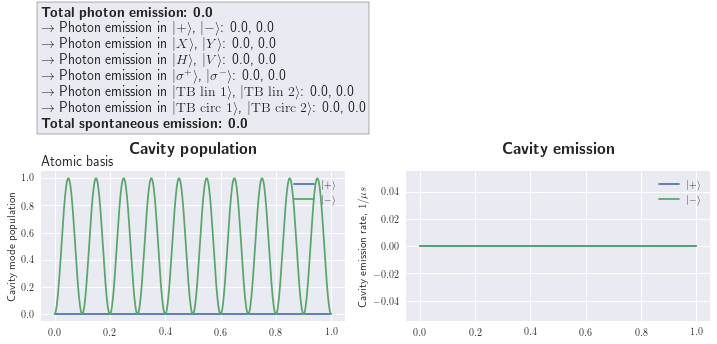

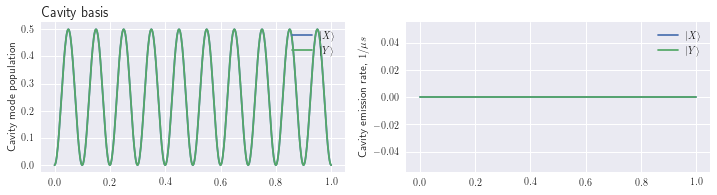

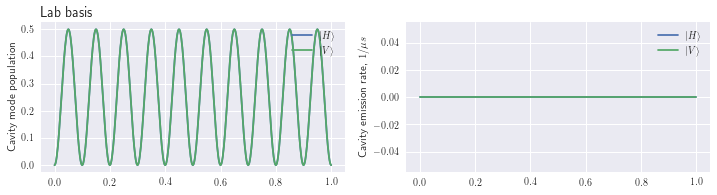

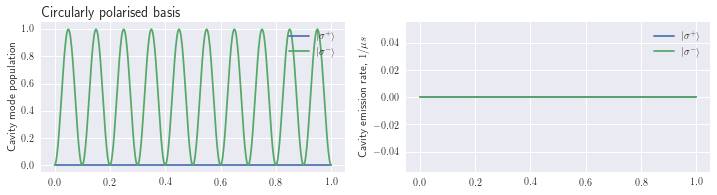

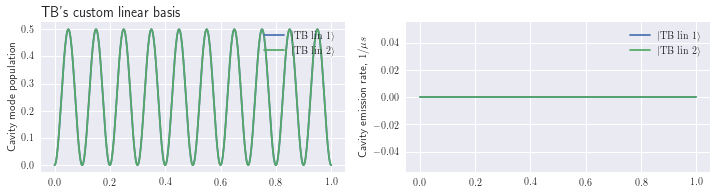

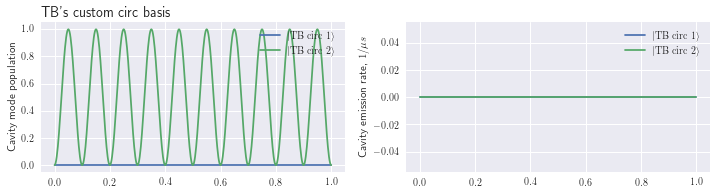

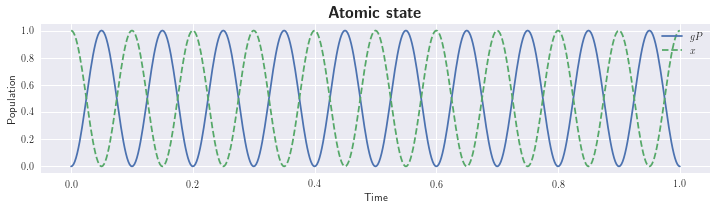

In [5]:
atom4lvl = Atom4lvl(gamma=0.0* 2*np.pi)
cav = CavityBiref(g = 5 * 2.*np.pi,
                  kappa1 = 0.0 * 2.*np.pi,
                  kappa2 = 0.0 * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

psi0 = runner.ket('x',0, 0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot(atom_states=['gP','x'], pol_bases=['atom','cavity','linear','circ',
                                                # Custom linear basis
                                                [np.sqrt(1 / 2) * np.matrix([[1,0],[0,1]]),
                                                 'TB\'s custom linear basis',
                                                 ['\mathrm{TB\ lin\ 1}','\mathrm{TB\ lin\ 2}']],
                                                # Custom circular basis
                                                [np.sqrt(1 / 2) * np.matrix([[1,i],[i,1]]),
                                                 'TB\'s custom circ basis',
                                                 ['$\mathrm{TB\ circ\ 1}$','$\mathrm{TB\ circ\ 2}$']] ] )

### 2.3 Changing polarisation bases

The orientation of the 'cavity basis', i.e. the polarisation eigenmode ($\{|X>,|Y>\}$), is expressed in terms of the linearly polarised 'lab basis' ($\{|H>,|V>\}$).  To set this we pass the CavityBiref obeject the rotation matrix $R_{CL}$ that maps $\{|X>,|Y>\} \rightarrow \{|H>,|V>\}$

Similarly the orientation of the 'mirror basis' (${|M1>,|M2>}$) is defined in terms of the lab basis by rotation matrix $R_{ML}$.  This basis is the polarisations that decay from the cavity at rates $\kappa_1$ and $\kappa_2$ respectively.

**Note**

The 'atomic basis', i.e. the polarisation of the transitions coupled by the cavity, is defined by the Atom4lvl.R_AL (or Atom87Rb.R_AL) in a similar manner.  However, changing default setting -- which is to consider the atomic transition to be circularly polarised -- is not likely to result in a physically realistic system and so is not adviced.  As is often quoted of Python 'We are consenting adults', so you are still able to change R_AL if you desire.

Change $\alpha_{CL}$ and $\phi_{CL}$ in the below to define the cavity basis in an arbitrary alignment to the lab basis.  As the splitting of these modes is $\Delta_P=0$ it makes no difference to the dynamics of the system, however the projection of the |g,1,0> state (i.e. atom in 'g', and 1 photon in the X mode of the cavity) onto the linear lab and circular bases changes accordingly.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_0_10618.pyx.  Generated in 4.054 seconds.
Running simulation with 501 timesteps...finished in 0.068 seconds


 None]

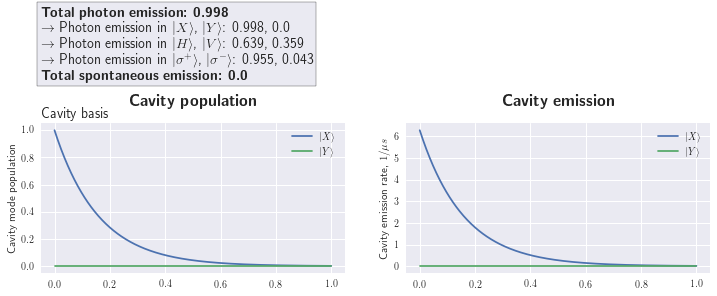

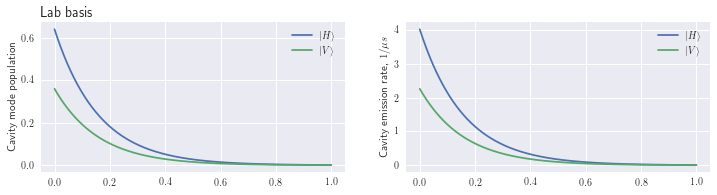

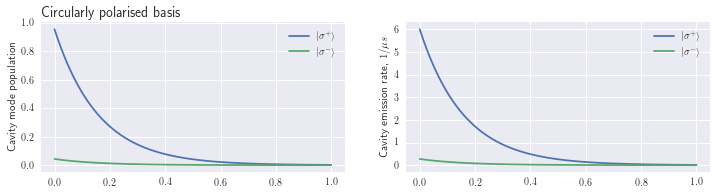

In [2]:
atom4lvl = Atom4lvl(gamma=0.0* 2*np.pi)

# Values for circularly polarised cavity modes.
# alpha_CL = 1/np.sqrt(2)
# phi_CL = np.pi/2
# beta_CL = np.sqrt(1-alpha_CL**2)

# Values for linearly polarised cavity modes.
# alpha_CL = 1
# phi_CL = 0
# beta_CL = np.sqrt(1-alpha_CL**2)

alpha_CL = 0.8
phi_CL = 0.4*np.pi
beta_CL = np.sqrt(1-alpha_CL**2)

R_CL = np.matrix([[alpha_CL,                    -beta_CL * np.exp(-i*phi_CL)],
                  [beta_CL * np.exp(i*phi_CL),  alpha_CL                    ]])

cav = CavityBiref(g = 5 * 2.*np.pi,
                  kappa1 = 0.5 * 2.*np.pi,
                  kappa2 = 0.5 * 2.*np.pi,
                  R_CL=R_CL)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=[],
                            verbose=True)

psi0 = runner.ket('gM',1, 0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot(atom_states=[], pol_bases=['cavity','lab','circ'])

**Note - valid values of rotation matrices**

Of course R_CL/R_ML are unitary mappings and so the matrices must be unitary!
They must also clearly be 2x2.

In [7]:
try:
    CavityBiref(R_CL=[[10,0],[0,1]])
except Exception as e:
    print(str(e))
    
try:
    CavityBiref(R_ML=[[1,0,0],[0,1,0],[0,0,1]])
except Exception as e:
    print(str(e))

Invalid value passed for R_CL.  Rotation matrices must be unitary.
Invalid value passed for R_ML.  Rotation matrices must have dimension (2,2).


### 2.4 Photon polarisation in birefringent cavities

We will consider a cavity with linear polarisation eigenmodes ($\{|X>=|H>,|Y>=|V>\}$) -- *note: this is also the default assumption of CavityBiref* -- thus $R_{CL}$is simply the identity matrix.  The energy splitting of these polarisation eigenmodes is given by $\Delta_P$.

To start, we place a $|+\rangle$ photon,
> $|+\rangle{} = (|H\rangle + i|V\rangle)/\sqrt{2} = (|X\rangle + i|Y\rangle)/\sqrt{2}$,
into a cavity with $\Delta_P=0$.

##### Circular starting polarisation: $|\psi_0\rangle = (|H\rangle + i|V\rangle)/\sqrt{2} = (|X\rangle + i|Y\rangle)/\sqrt{2}$

Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_3_10618.pyx, is suitable to run this experiment.
Running simulation with 501 timesteps...finished in 0.071 seconds


 None]

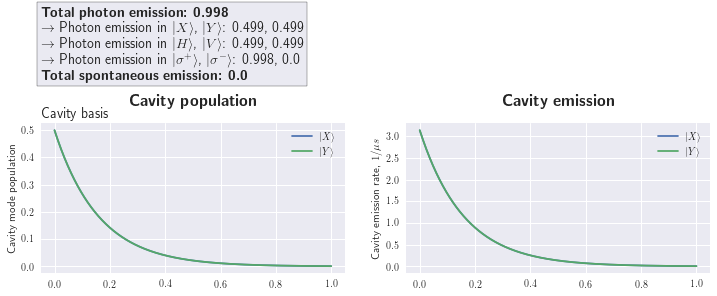

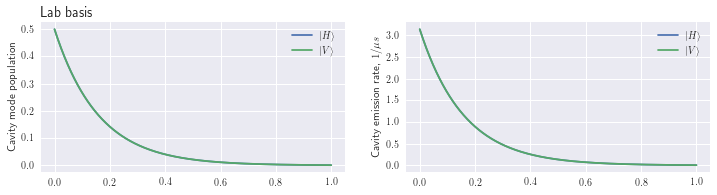

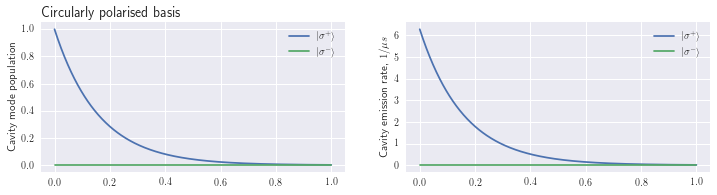

In [16]:
atom4lvl = Atom4lvl(gamma=0.0* 2*np.pi)

cav = CavityBiref(g = 5 * 2.*np.pi,
                  kappa1 = 0.5 * 2.*np.pi,
                  kappa2 = 0.5 * 2.*np.pi,
                  deltaP =  0 * 2.*np.pi,
                  R_CL=[[1,0],[0,1]])

runner = ExperimentalRunner(atom4lvl,cav,[],[],verbose=True)

psi0 = (runner.ket('gM',1, 0) + i*runner.ket('gM',0, 1)) / np.sqrt(2)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot(atom_states=[], pol_bases=['cav','lab','circ'])

However increasing the cavity birefringence, we see how as the linear cavity modes run out of phase, the circularaly polarised photon oscillates between $\sigma^{+}$ and $\sigma^{-}$.  A physical interpretation of this is to say that the non-degenerate linear polarisation eigenmodes can be modelled as degenerate circularly polarised modes that are coupled at the rate of this dephasign ($\Delta_P$).

Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_4_10618.pyx, is suitable to run this experiment.
Running simulation with 501 timesteps...finished in 0.067 seconds


 None]

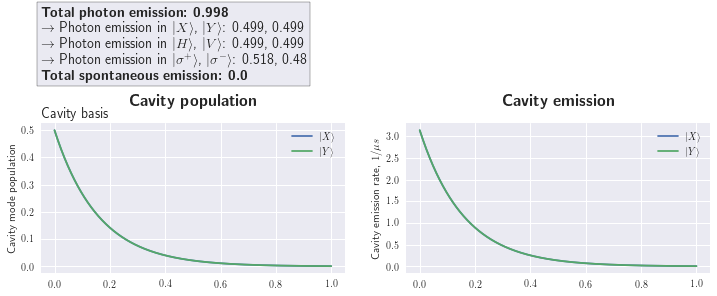

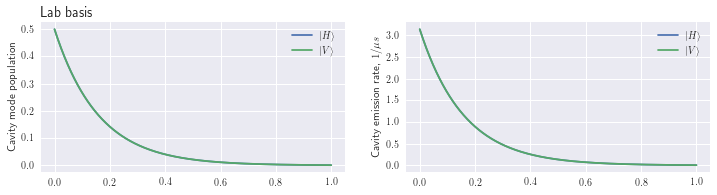

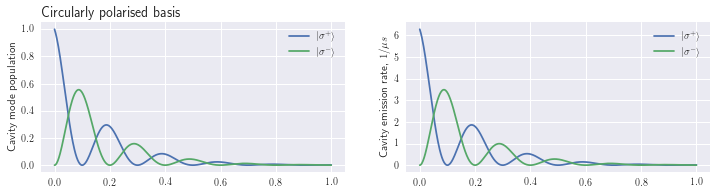

In [18]:
cav.deltaP = 5 * 2*np.pi

runner = ExperimentalRunner(atom4lvl,cav,[],[],verbose=True)

psi0 = (runner.ket('gM',1, 0) + i*runner.ket('gM',0, 1)) / np.sqrt(2)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot(atom_states=[], pol_bases=['cav','lab','circ'])

##### Linear starting polarisation: $|\psi_0\rangle = (|H\rangle + |V\rangle)/\sqrt{2} = (|X\rangle + |Y\rangle)/\sqrt{2}$

We can start the photon as a linearly polarised in an equal superposition of the cavity states and see the same.

Running simulation with 501 timesteps...finished in 0.074 seconds


 None]

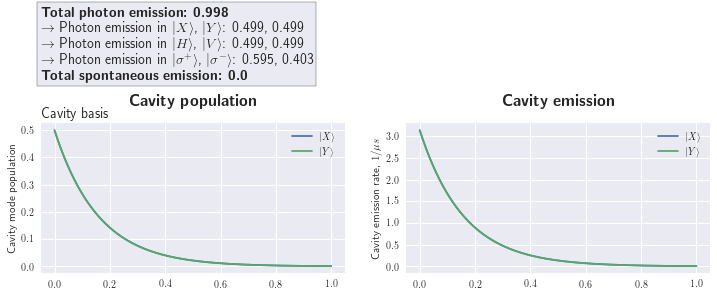

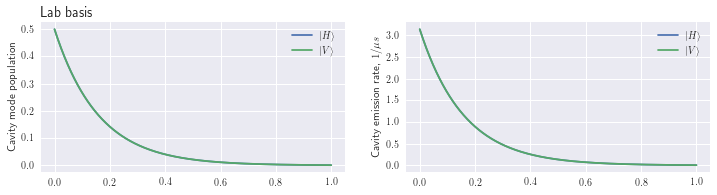

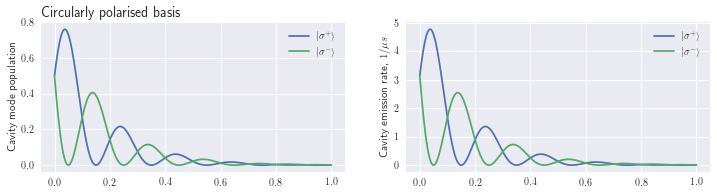

In [21]:
psi0 = (runner.ket('gM',1, 0) + runner.ket('gM',0, 1)) / np.sqrt(2)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot(atom_states=[], pol_bases=['cav','lab','circ'])

##### Elliptical starting polarisation: $|\psi_0\rangle = \sqrt{\frac{3}{4}}|H\rangle + i\sqrt{\frac{1}{4}}|V\rangle) = \sqrt{\frac{3}{4}}|X\rangle + i\sqrt{\frac{1}{4}}|Y\rangle)$

Of course we do not need to start in an equal superpostion of the cavity modes.

Running simulation with 501 timesteps...finished in 0.091 seconds


 None]

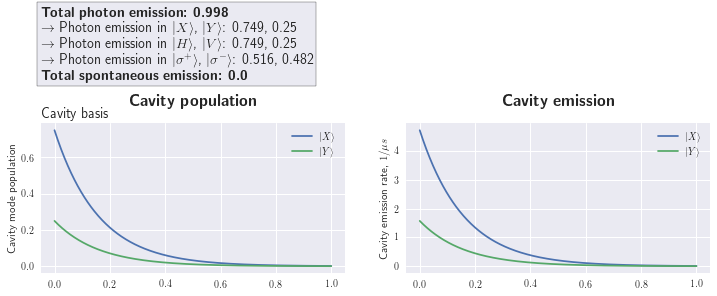

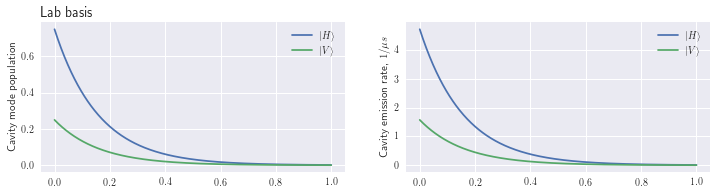

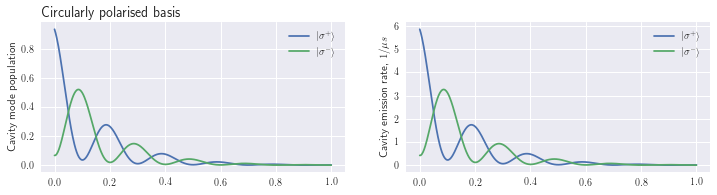

In [28]:
psi0 = (np.sqrt(0.75)*runner.ket('gM',1, 0) + i*np.sqrt(0.25)*runner.ket('gM',0, 1))
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot(atom_states=[], pol_bases=['cav','lab','circ'])

### 2.3 Polarisation dependent mirror decays

### 2.4 v-Stirap in birefringent cavities

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

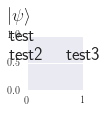

In [10]:
fig = plt.figure(figsize=(1,1))
t = "$|\psi\\rangle$\ntest\n test2\ \ \ \ test3"
plt.text(0.5, 0.5, t, fontsize=18,  ha='center', usetex=True,
         va='bottom', multialignment='left')

plt.show()